# Initial State

In [1]:
import math
import matplotlib.pyplot as plt
import random

import poe
import pos
import utils

%matplotlib inline

## Parameters

In [2]:
# Shared PoS and PoE
n_validators = 20
commission_rate_base = 0.1
self_stake_base = 0.7
self_stake_max = 4_000_000
delegation_initial = 0
inflation_rate = 1_000_000
fixed_cost = 10_000

# PoE only
engagement_base = 0.7
engagement_max = 10_000

## Proof of Stake

In [3]:
params_pos = {
    'inflation_rate': inflation_rate,
}

In [4]:
validators_pos = utils.create_validators(n_validators, commission_rate_base, self_stake_base, self_stake_max, delegation_initial, 0, 0)
self_stakes_pos = [validator['self_stake'] for validator in validators_pos]
voting_weights_pos = [pos.calculate_voting_weight(validator) for validator in validators_pos]
total_voting_weight_pos = sum(voting_weights_pos)
rewards_pos = [pos.calculate_reward(validator, total_voting_weight_pos, params_pos) for validator in validators_pos]
profits_pos = [reward - fixed_cost for reward in rewards_pos]

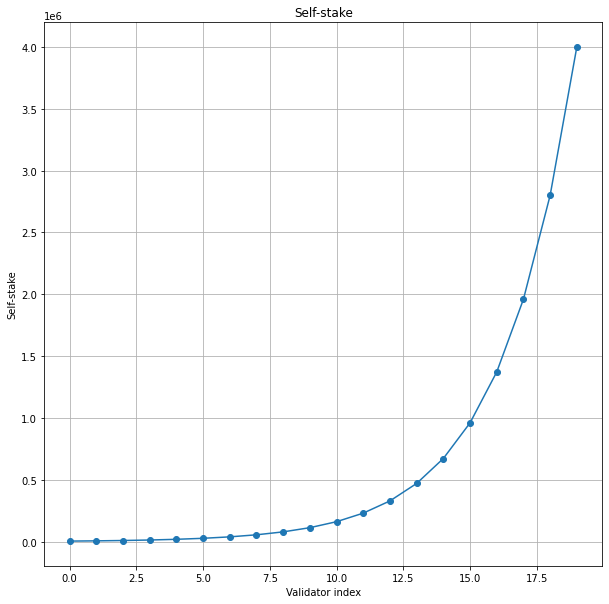

In [5]:
plt.figure(figsize=(10, 10))

plt.plot(self_stakes_pos, marker='o')
plt.title('Self-stake')
plt.xlabel('Validator index')
plt.ylabel('Self-stake')
plt.grid()
plt.show()

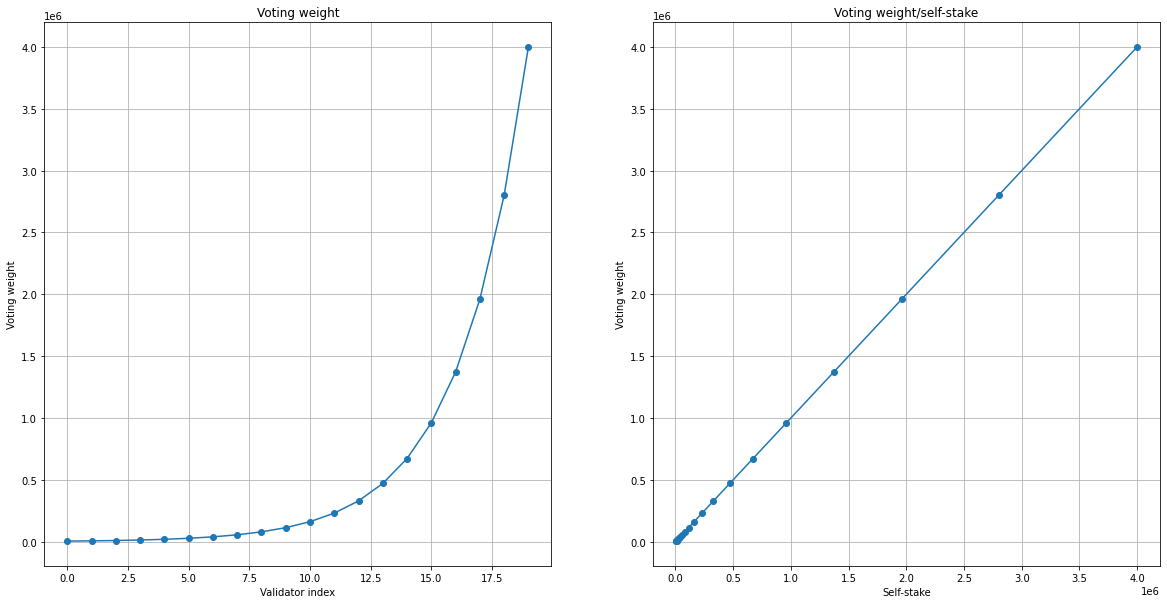

In [6]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(voting_weights_pos, marker='o')
plt.title('Voting weight')
plt.xlabel('Validator index')
plt.ylabel('Voting weight')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(self_stakes_pos, voting_weights_pos, marker='o')
plt.title('Voting weight/self-stake')
plt.xlabel('Self-stake')
plt.ylabel('Voting weight')
plt.grid()

plt.show()

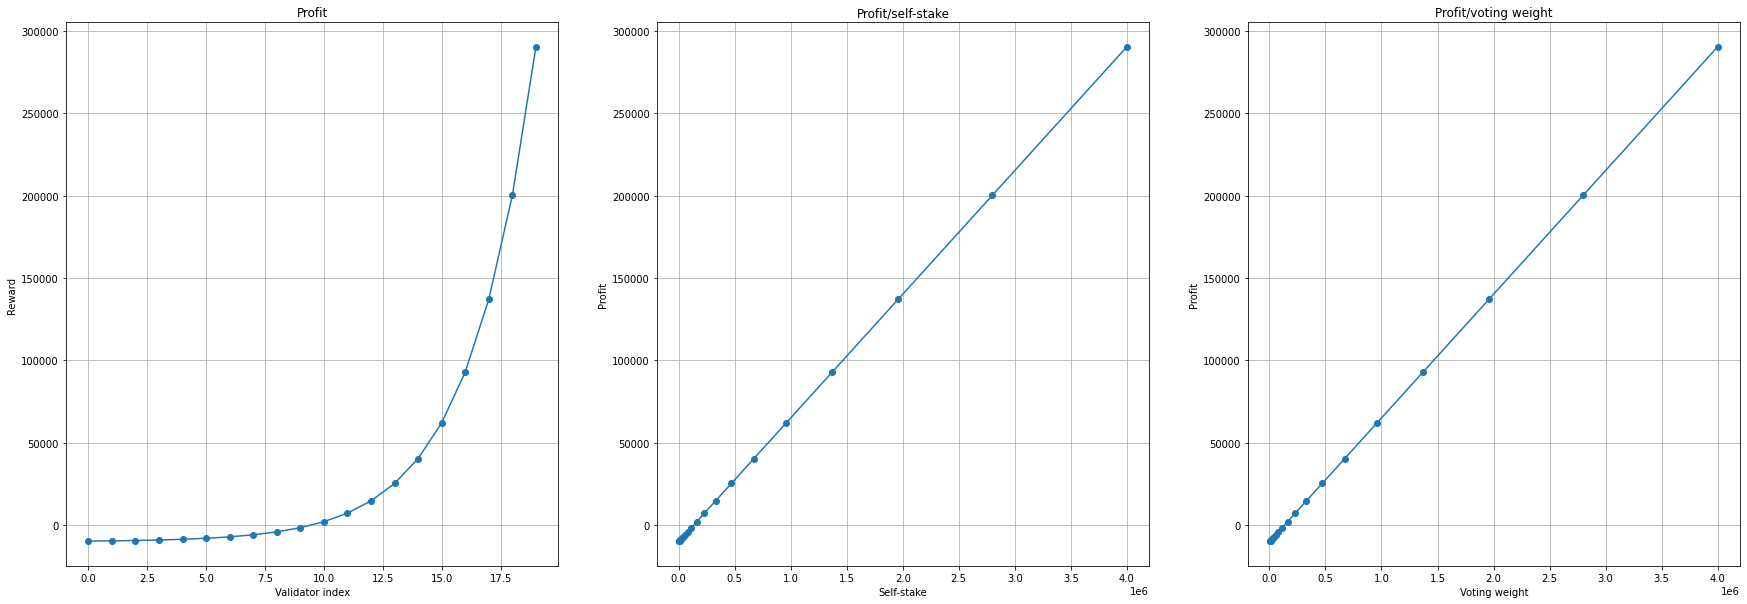

In [7]:
plt.figure(figsize=(30, 10))

plt.subplot(1, 3, 1)
plt.plot(profits_pos, marker='o')
plt.title('Profit')
plt.xlabel('Validator index')
plt.ylabel('Reward')
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(self_stakes_pos, profits_pos, marker='o')
plt.title('Profit/self-stake')
plt.xlabel('Self-stake')
plt.ylabel('Profit')
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(voting_weights_pos, profits_pos, marker='o')
plt.title('Profit/voting weight')
plt.xlabel('Voting weight')
plt.ylabel('Profit')
plt.grid()

plt.show()

In [8]:
gini_coefficient_pos_voting_weights = utils.calculate_gini_coefficient(voting_weights_pos)
gini_coefficient_pos_profits = utils.calculate_gini_coefficient(profits_pos)

print('PoS Gini coefficients')
print(f'Voting weights: %f' % gini_coefficient_pos_voting_weights)
print(f'Profits: %f' % gini_coefficient_pos_profits)

PoS Gini coefficients
Voting weights: 0.718264
Profits: 0.897830


## Proof of Engagement

In [9]:
params_poe = {
    'f': poe.default_sigmoidal,
    'inflation_rate': inflation_rate,
}

### Engagement positively correlated with self-stake

In [10]:
validators_poe_correlated = utils.create_validators(n_validators, commission_rate_base, self_stake_base, self_stake_max, engagement_base, engagement_max, delegation_initial, shuffle_engagements=False)
self_stakes_poe_correlated = [validator['self_stake'] for validator in validators_poe_correlated]
engagements_poe_correlated = [validator['engagement'] for validator in validators_poe_correlated]
voting_weights_poe_correlated = [poe.calculate_voting_weight(validator, params_poe) for validator in validators_poe_correlated]
total_voting_weight_poe_correlated = sum(voting_weights_poe_correlated)
rewards_poe_correlated = [poe.calculate_reward(validator, total_voting_weight_poe_correlated, params_poe) for validator in validators_poe_correlated]
profits_poe_correlated = [reward - fixed_cost for reward in rewards_poe_correlated]

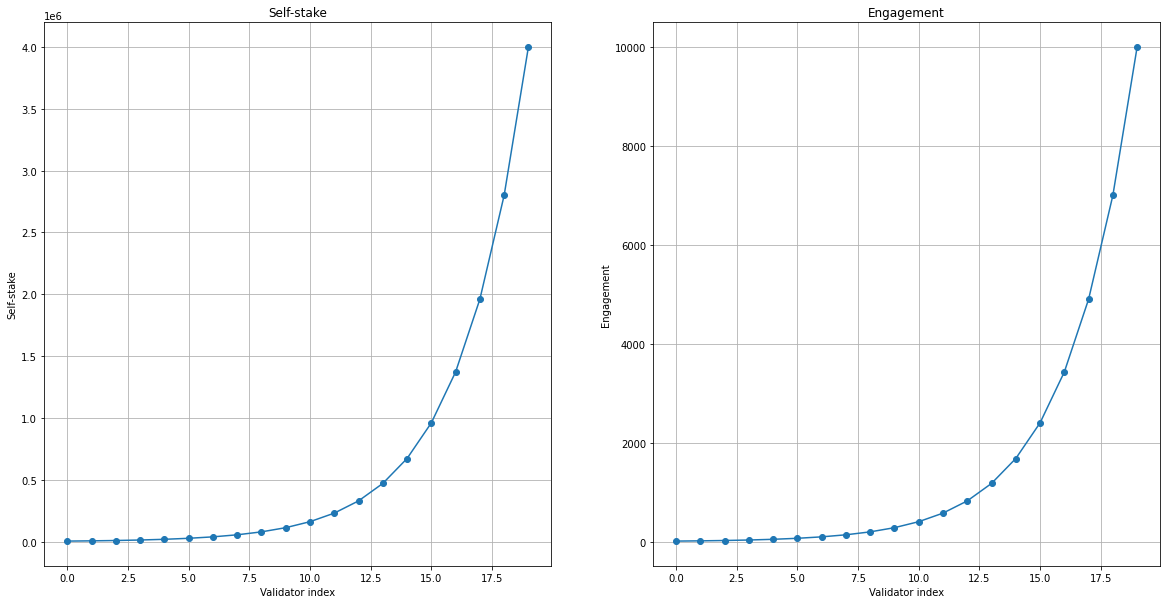

In [11]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(self_stakes_poe_correlated, marker='o')
plt.title('Self-stake')
plt.xlabel('Validator index')
plt.ylabel('Self-stake')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(engagements_poe_correlated, marker='o')
plt.title('Engagement')
plt.xlabel('Validator index')
plt.ylabel('Engagement')
plt.grid()

plt.show()

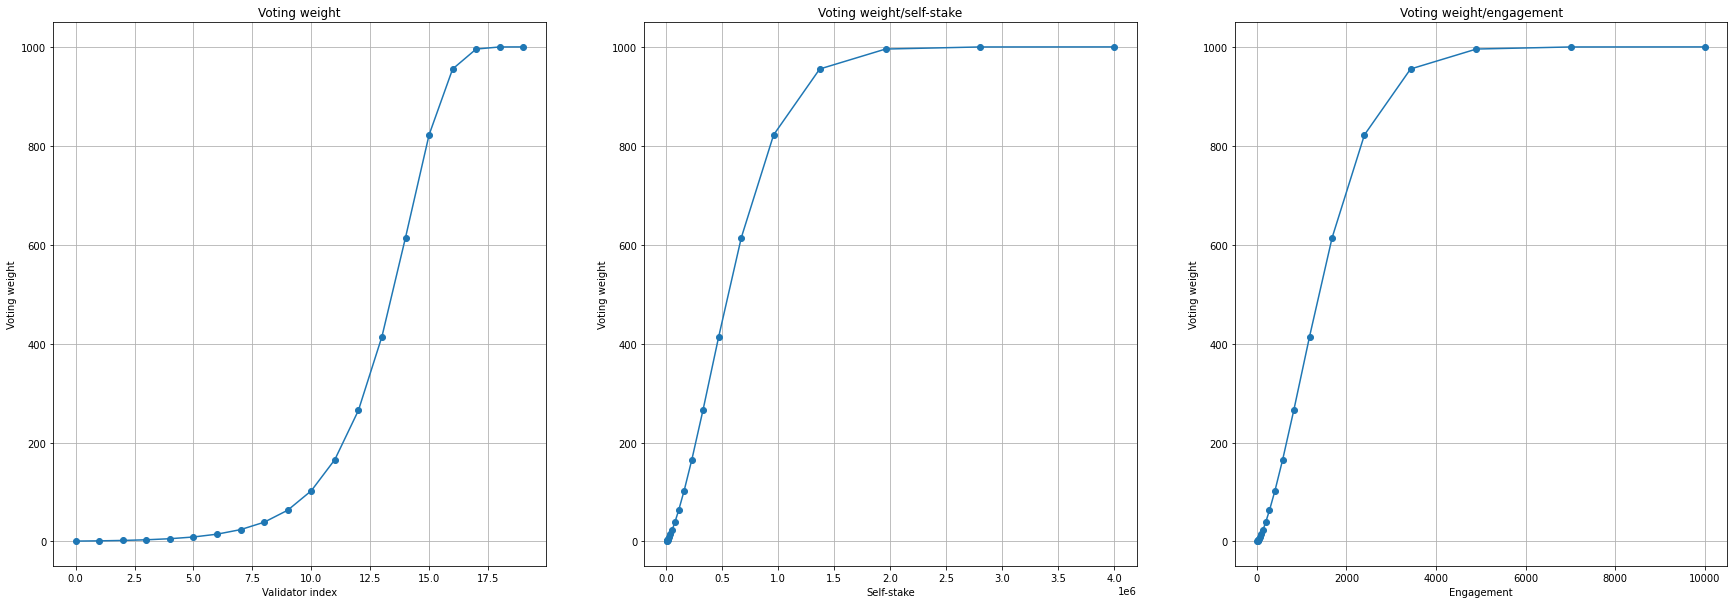

In [12]:
plt.figure(figsize=(30, 10))

plt.subplot(1, 3, 1)
plt.plot(voting_weights_poe_correlated, marker='o')
plt.title('Voting weight')
plt.xlabel('Validator index')
plt.ylabel('Voting weight')
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(self_stakes_poe_correlated, voting_weights_poe_correlated, marker='o')
plt.title('Voting weight/self-stake')
plt.xlabel('Self-stake')
plt.ylabel('Voting weight')
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(engagements_poe_correlated, voting_weights_poe_correlated, marker='o')
plt.title('Voting weight/engagement')
plt.xlabel('Engagement')
plt.ylabel('Voting weight')
plt.grid()

plt.show()

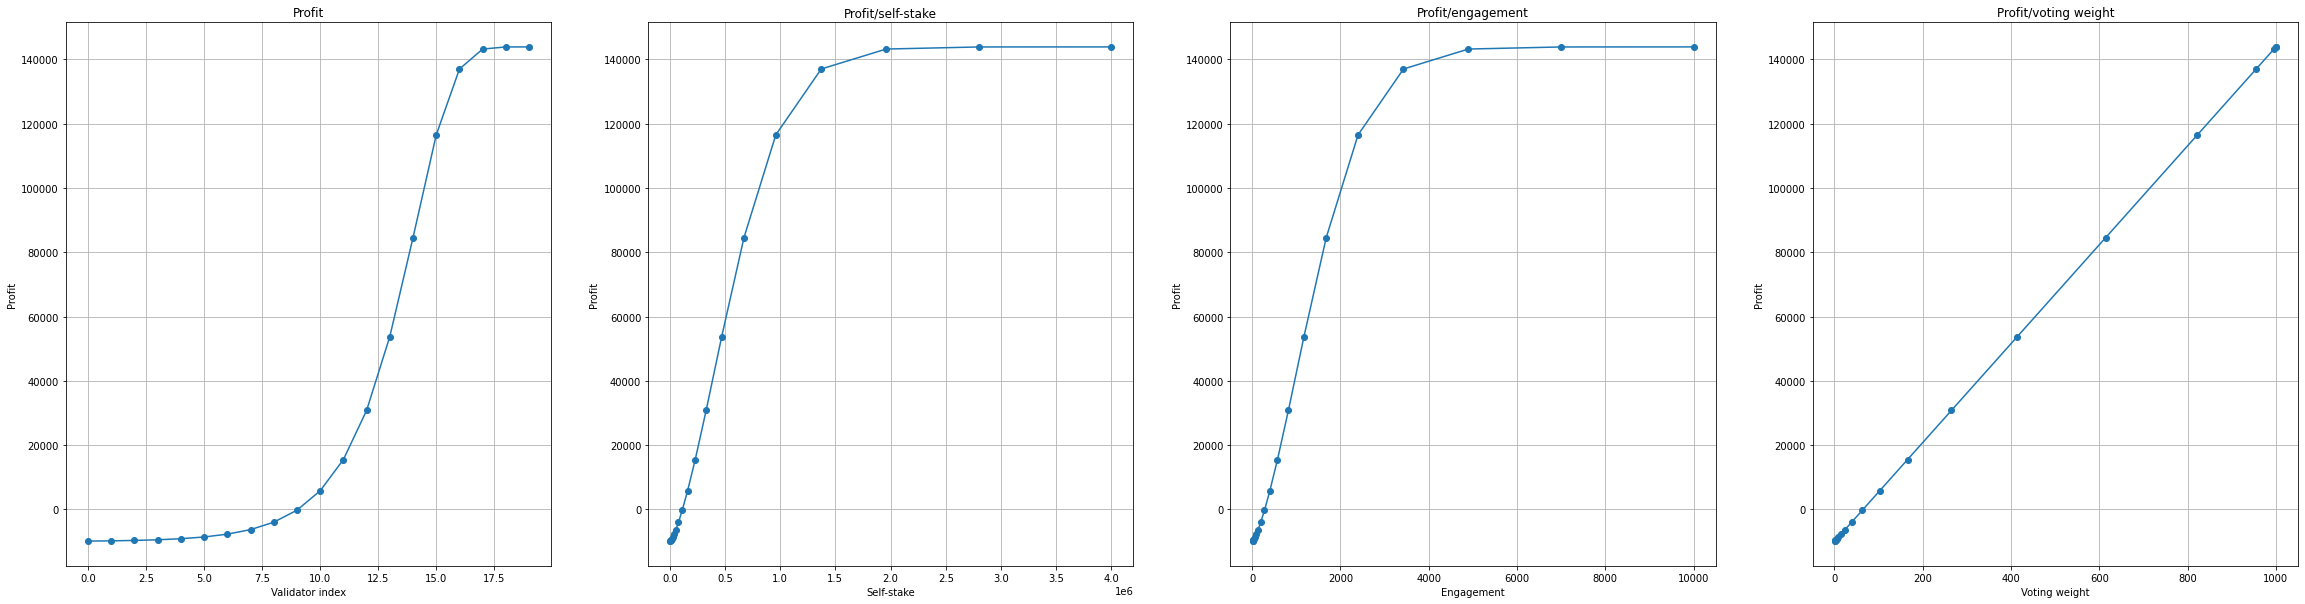

In [13]:
plt.figure(figsize=(40, 10))

plt.subplot(1, 4, 1)
plt.plot(profits_poe_correlated, marker='o')
plt.title('Profit')
plt.xlabel('Validator index')
plt.ylabel('Profit')
plt.grid()

plt.subplot(1, 4, 2)
plt.plot(self_stakes_poe_correlated, profits_poe_correlated, marker='o')
plt.title('Profit/self-stake')
plt.xlabel('Self-stake')
plt.ylabel('Profit')
plt.grid()

plt.subplot(1, 4, 3)
plt.plot(engagements_poe_correlated, profits_poe_correlated, marker='o')
plt.title('Profit/engagement')
plt.xlabel('Engagement')
plt.ylabel('Profit')
plt.grid()

plt.subplot(1, 4, 4)
plt.plot(voting_weights_poe_correlated, profits_poe_correlated, marker='o')
plt.title('Profit/voting weight')
plt.xlabel('Voting weight')
plt.ylabel('Profit')
plt.grid()

plt.show()

In [14]:
gini_coefficient_poe_correlated_voting_weights = utils.calculate_gini_coefficient(voting_weights_poe_correlated)
gini_coefficient_poe_correlated_profits = utils.calculate_gini_coefficient(profits_poe_correlated)

print('PoE (correlated) Gini coefficients')
print(f'Voting weights: %f' % gini_coefficient_poe_correlated_voting_weights)
print(f'Profits: %f' % gini_coefficient_poe_correlated_profits)

PoE (correlated) Gini coefficients
Voting weights: 0.631614
Profits: 0.789517


### Engagement uncorrelated with self-stake

In [15]:
validators_poe_uncorrelated = utils.create_validators(n_validators, commission_rate_base, self_stake_base, self_stake_max, engagement_base, engagement_max, delegation_initial, shuffle_engagements=True)
self_stakes_poe_uncorrelated = [validator['self_stake'] for validator in validators_poe_uncorrelated]
engagements_poe_uncorrelated = [validator['engagement'] for validator in validators_poe_uncorrelated]
voting_weights_poe_uncorrelated = [poe.calculate_voting_weight(validator, params_poe) for validator in validators_poe_uncorrelated]
total_voting_weight_poe_uncorrelated = sum(voting_weights_poe_uncorrelated)
rewards_poe_uncorrelated = [poe.calculate_reward(validator, total_voting_weight_poe_uncorrelated, params_poe) for validator in validators_poe_uncorrelated]
profits_poe_uncorrelated = [reward - fixed_cost for reward in rewards_poe_uncorrelated]

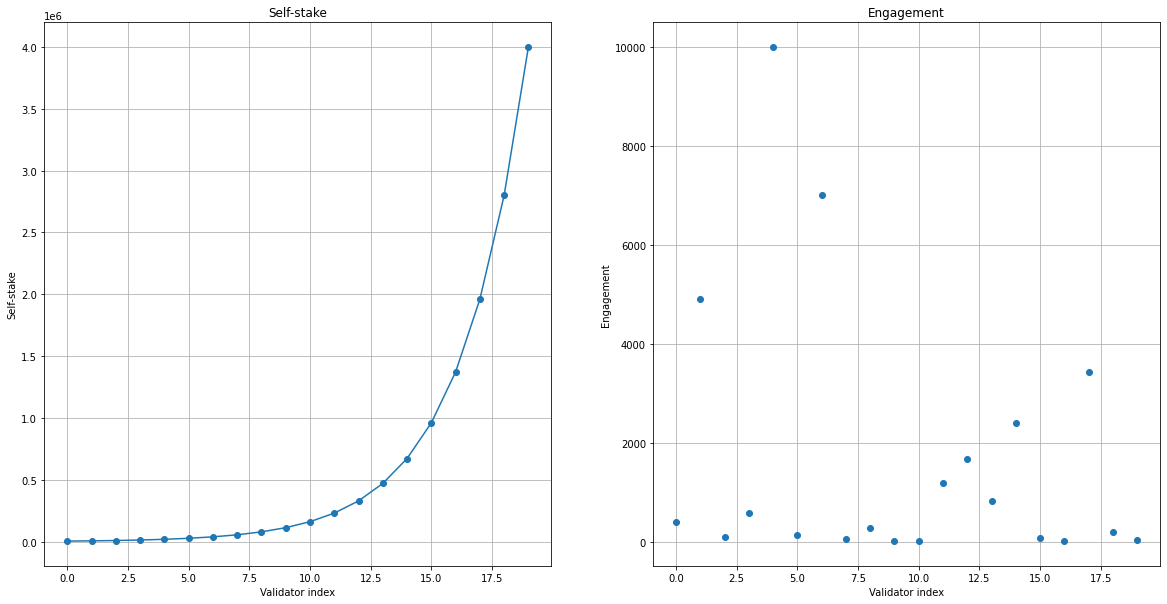

In [16]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(self_stakes_poe_uncorrelated, marker='o')
plt.title('Self-stake')
plt.xlabel('Validator index')
plt.ylabel('Self-stake')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(engagements_poe_uncorrelated, 'o')
plt.title('Engagement')
plt.xlabel('Validator index')
plt.ylabel('Engagement')
plt.grid()

plt.show()

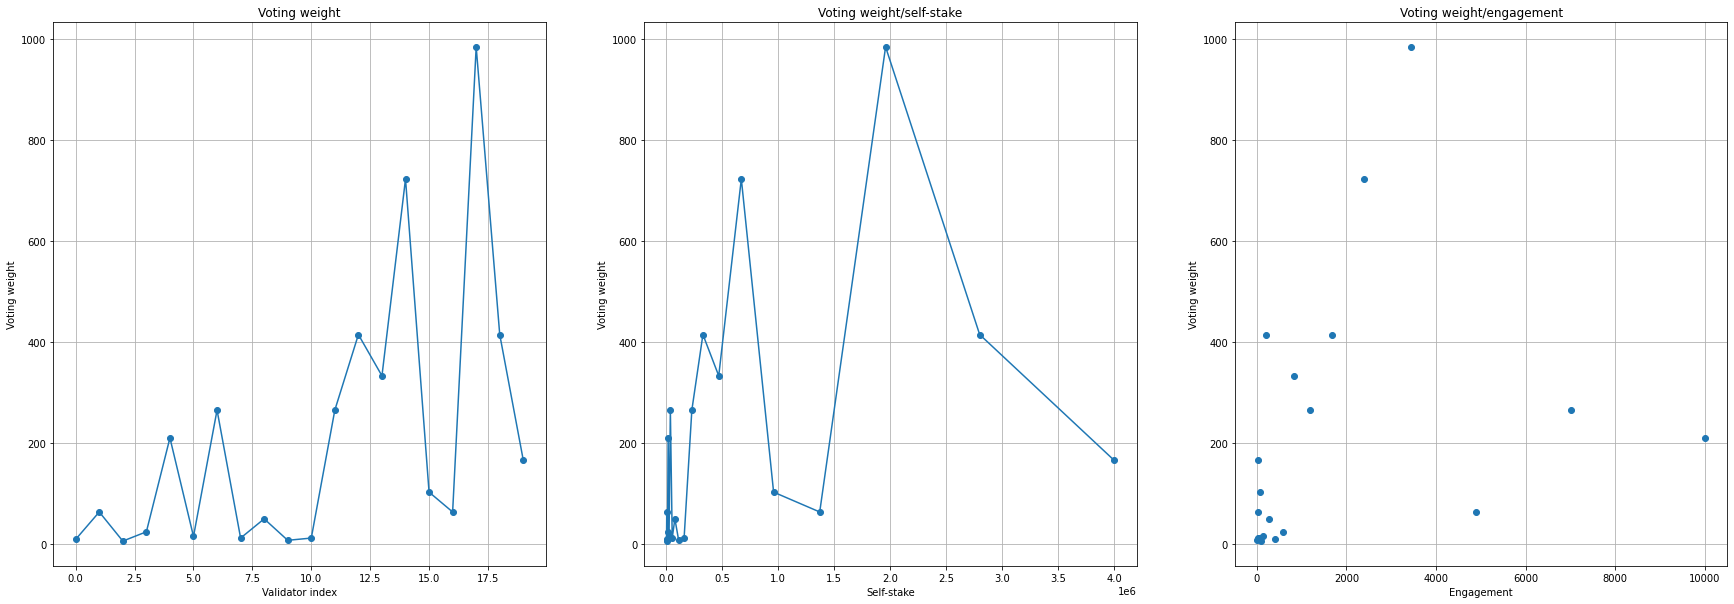

In [17]:
plt.figure(figsize=(30, 10))

plt.subplot(1, 3, 1)
plt.plot(voting_weights_poe_uncorrelated, marker='o')
plt.title('Voting weight')
plt.xlabel('Validator index')
plt.ylabel('Voting weight')
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(self_stakes_poe_uncorrelated, voting_weights_poe_uncorrelated, marker='o')
plt.title('Voting weight/self-stake')
plt.xlabel('Self-stake')
plt.ylabel('Voting weight')
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(engagements_poe_uncorrelated, voting_weights_poe_uncorrelated, 'o')
plt.title('Voting weight/engagement')
plt.xlabel('Engagement')
plt.ylabel('Voting weight')
plt.grid()

plt.show()

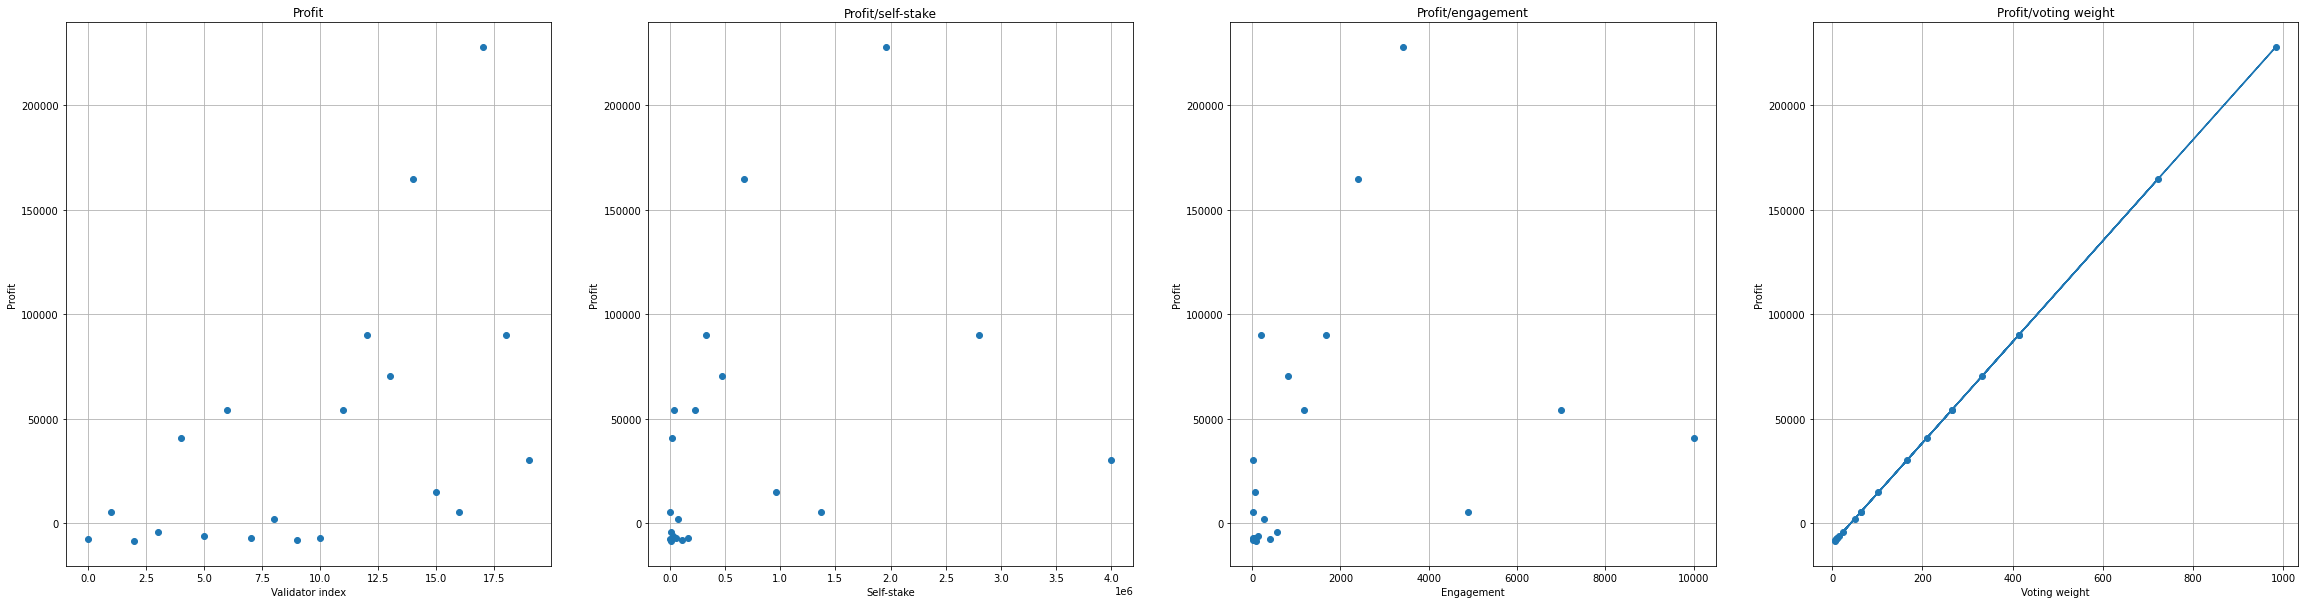

In [18]:
plt.figure(figsize=(40, 10))

plt.subplot(1, 4, 1)
plt.plot(profits_poe_uncorrelated, 'o')
plt.title('Profit')
plt.xlabel('Validator index')
plt.ylabel('Profit')
plt.grid()

plt.subplot(1, 4, 2)
plt.plot(self_stakes_poe_uncorrelated, profits_poe_uncorrelated, 'o')
plt.title('Profit/self-stake')
plt.xlabel('Self-stake')
plt.ylabel('Profit')
plt.grid()

plt.subplot(1, 4, 3)
plt.plot(engagements_poe_uncorrelated, profits_poe_uncorrelated, 'o')
plt.title('Profit/engagement')
plt.xlabel('Engagement')
plt.ylabel('Profit')
plt.grid()

plt.subplot(1, 4, 4)
plt.plot(voting_weights_poe_uncorrelated, profits_poe_uncorrelated, marker='o')
plt.title('Profit/voting weight')
plt.xlabel('Voting weight')
plt.ylabel('Profit')
plt.grid()

plt.show()

In [19]:
gini_coefficient_poe_uncorrelated_voting_weights = utils.calculate_gini_coefficient(voting_weights_poe_uncorrelated)
gini_coefficient_poe_uncorrelated_profits = utils.calculate_gini_coefficient(profits_poe_uncorrelated)

print('PoE (uncorrelated) Gini coefficients')
print(f'Voting weights: %f' % gini_coefficient_poe_uncorrelated_voting_weights)
print(f'Profits: %f' % gini_coefficient_poe_uncorrelated_profits)

PoE (uncorrelated) Gini coefficients
Voting weights: 0.612730
Profits: 0.765912
